#  Data Science - Exam Project

## The Medias Influence On The Stock Market

### *Hypothesis*:  INDSÆT VORES HYP HER
### *Null hypothesis*:   INDSÆT VORES NULL HYP HER

### Group Members
- Allan Simonsen cph-as484@cphbusiness.dk
- Jean-Poul Leth-Møller cph-jl360@cphbusiness.dk
- Nina Lisakowski cph-nl163@cphbusiness.dk


## 1. Environment Setup

In [84]:
# Pandas -used for structuring data
import pandas as pd

# numpy - Multi dimensional datastructure tool
import numpy as np

# Seaborn & matplotlib - used for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from pandas.plotting import scatter_matrix

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

###### 2. Import and cleaning of data
This project contains 2 datasets.  
- **Ticker dataset**  
This dataset contains information about a specific stock. logging every day its opening price,closing price and volume.  
[Link to dataset](https://www.kaggle.com/datasets/paultimothymooney/stock-market-data)  

- **News media dataset**  
This dataset contains multiple thousands of headlines spaning over a decade. Row consist of headline, date of article and ticker(the stock that is related)
[Link to dataset](https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests)

### 2.1 Ticker dataset

In [2]:
ticker_df = pd.read_csv('../data/stock_market_data/nasdaq/csv/NVDA.csv', delimiter=",")

In [3]:
ticker_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886
1,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370
2,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065
3,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869
4,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673


In [4]:
ticker_df.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
5848,19-04-2022,213.139999,217.199997,51278100,223.729996,221.979996,221.979996
5849,20-04-2022,212.000000,225.169998,46897400,226.699997,214.820007,214.820007
5850,21-04-2022,200.000000,217.089996,65620900,223.919998,201.830002,201.830002
5851,22-04-2022,195.000000,203.029999,62356500,204.860001,195.149994,195.149994
5852,25-04-2022,190.960007,192.020004,53252181,198.460007,194.479996,194.479996


#### 2.1.1 Describing the dataset

In [5]:
ticker_df.shape

(5853, 7)

In [6]:
ticker_df.columns

Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'], dtype='object')

In [7]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5853 non-null   object 
 1   Low             5853 non-null   float64
 2   Open            5853 non-null   float64
 3   Volume          5853 non-null   int64  
 4   High            5853 non-null   float64
 5   Close           5853 non-null   float64
 6   Adjusted Close  5853 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 320.2+ KB


In [29]:
# Checking for null values in data
ticker_df.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
Gain or Loss      0
Day-Month-Year    0
dtype: int64

In [30]:
ticker_df.describe()

,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
count,5853.000000,5853.000000,5.853000e+03,5853.000000,5853.000000,5853.000000,5853.000000
mean,24.494390,24.988110,6.172271e+07,25.435754,24.976619,24.740922,0.493080
std,51.379501,52.551047,4.486185e+07,53.560622,52.482870,52.525937,0.499995
min,0.333333,0.348958,1.968000e+06,0.355469,0.341146,0.313474,0.000000
25%,2.502604,2.582500,3.382080e+07,2.667500,2.591146,2.380965,0.000000
50%,3.931667,4.002500,5.160040e+07,4.075000,3.997500,3.715069,0.000000
75%,11.800000,11.902500,7.566240e+07,11.982500,11.890000,11.699721,1.000000
max,320.359985,335.170013,9.230856e+08,346.470001,333.760010,333.760010,1.000000


#### 2.1.2 Initial Cleaning of dataset

In [9]:
# We want to add a column to be able to see if our stock of interest has gone up or down on the given day
# First we convert this boolean values
ticker_df['Gain or Loss'] = ticker_df['Close'] > ticker_df['Open']

ticker_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
0,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886,False
1,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370,True
2,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065,False
3,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869,False
4,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673,False


In [10]:
# Hereafter we convert this to binary values in form of 1 or 0 to be able to use this when training our model
ticker_df['Gain or Loss'] = ticker_df['Gain or Loss'].astype(int)

ticker_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
0,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886,0
1,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370,1
2,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065,0
3,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869,0
4,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673,0


In [11]:
# Now we want to convert the Date object to be able to match values to this converted string and use it with pandas datetime
# ticker_df['Date']
ticker_df['Day-Month-Year'] = pd.to_datetime(ticker_df['Date'].str[:], format="%d-%m-%Y", errors='coerce')
ticker_df['Day-Month-Year']

0      1999-01-22
1      1999-01-25
2      1999-01-26
3      1999-01-27
4      1999-01-28
          ...    
5848   2022-04-19
5849   2022-04-20
5850   2022-04-21
5851   2022-04-22
5852   2022-04-25
Name: Day-Month-Year, Length: 5853, dtype: datetime64[ns]

In [12]:
time_ticker_df = ticker_df.sort_values(by = 'Day-Month-Year')
time_ticker_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss,Day-Month-Year
0,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886,0,1999-01-22
1,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370,1,1999-01-25
2,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065,0,1999-01-26
3,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869,0,1999-01-27
4,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673,0,1999-01-28
...,...,...,...,...,...,...,...,...,...
5848,19-04-2022,213.139999,217.199997,51278100,223.729996,221.979996,221.979996,1,2022-04-19
5849,20-04-2022,212.000000,225.169998,46897400,226.699997,214.820007,214.820007,0,2022-04-20
5850,21-04-2022,200.000000,217.089996,65620900,223.919998,201.830002,201.830002,0,2022-04-21
5851,22-04-2022,195.000000,203.029999,62356500,204.860001,195.149994,195.149994,0,2022-04-22


In [13]:
# Now moving the Day_Month_Year column to the beginning of the dataframe.
columns = time_ticker_df.columns.tolist()
columns

['Date',
 'Low',
 'Open',
 'Volume',
 'High',
 'Close',
 'Adjusted Close',
 'Gain or Loss',
 'Day-Month-Year']

In [14]:
columns = columns[-1:] + columns[:-1]
columns

['Day-Month-Year',
 'Date',
 'Low',
 'Open',
 'Volume',
 'High',
 'Close',
 'Adjusted Close',
 'Gain or Loss']

In [15]:
time_ticker_df = time_ticker_df[columns]
time_ticker_df

,Day-Month-Year,Date,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
0,1999-01-22,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886,0
1,1999-01-25,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370,1
2,1999-01-26,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065,0
3,1999-01-27,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869,0
4,1999-01-28,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673,0
...,...,...,...,...,...,...,...,...,...
5848,2022-04-19,19-04-2022,213.139999,217.199997,51278100,223.729996,221.979996,221.979996,1
5849,2022-04-20,20-04-2022,212.000000,225.169998,46897400,226.699997,214.820007,214.820007,0
5850,2022-04-21,21-04-2022,200.000000,217.089996,65620900,223.919998,201.830002,201.830002,0
5851,2022-04-22,22-04-2022,195.000000,203.029999,62356500,204.860001,195.149994,195.149994,0


In [74]:
# We will now investigate which categories the target column contains
time_ticker_df['Gain or Loss'].value_counts()

0    2967
1    2886
Name: Gain or Loss, dtype: int64

In [16]:
time_ticker_df['Day-Month-Year'].shape

(5853,)

In [17]:
time_ticker_df['Day-Month-Year'].unique()

array(['1999-01-22T00:00:00.000000000', '1999-01-25T00:00:00.000000000',
       '1999-01-26T00:00:00.000000000', ...,
       '2022-04-21T00:00:00.000000000', '2022-04-22T00:00:00.000000000',
       '2022-04-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [18]:
# Since we do not want to have the data cluttered by time we only take day, month and year
time_ticker_df['Day-Month-Year'] = time_ticker_df['Day-Month-Year'].dt.day.astype(str).str.zfill(2) + '-' + time_ticker_df['Day-Month-Year'].dt.month.astype(str).str.zfill(2) + '-' +  time_ticker_df['Day-Month-Year'].dt.year.astype(str).str[:4]
time_ticker_df['Day-Month-Year'].unique()

array(['22-01-1999', '25-01-1999', '26-01-1999', ..., '21-04-2022',
       '22-04-2022', '25-04-2022'], dtype=object)

#### 2.1.3 Exploring and visualizing the data

In [31]:
# Now let us explore and play with the dataset to gain insights after we have cleaned the data
# To start of with let us see if we can find any correlation in the dataset
corr_matrix = time_ticker_df.corr()
corr_matrix

,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
Low,1.000000,0.999765,-0.147768,0.999718,0.999780,0.999776,0.001745
Open,0.999765,1.000000,-0.145616,0.999791,0.999488,0.999485,-0.003171
Volume,-0.147768,-0.145616,1.000000,-0.143587,-0.145668,-0.145899,0.016532
High,0.999718,0.999791,-0.143587,1.000000,0.999756,0.999754,0.001250
Close,0.999780,0.999488,-0.145668,0.999756,1.000000,0.999997,0.006179
Adjusted Close,0.999776,0.999485,-0.145899,0.999754,0.999997,1.000000,0.006084
Gain or Loss,0.001745,-0.003171,0.016532,0.001250,0.006179,0.006084,1.000000


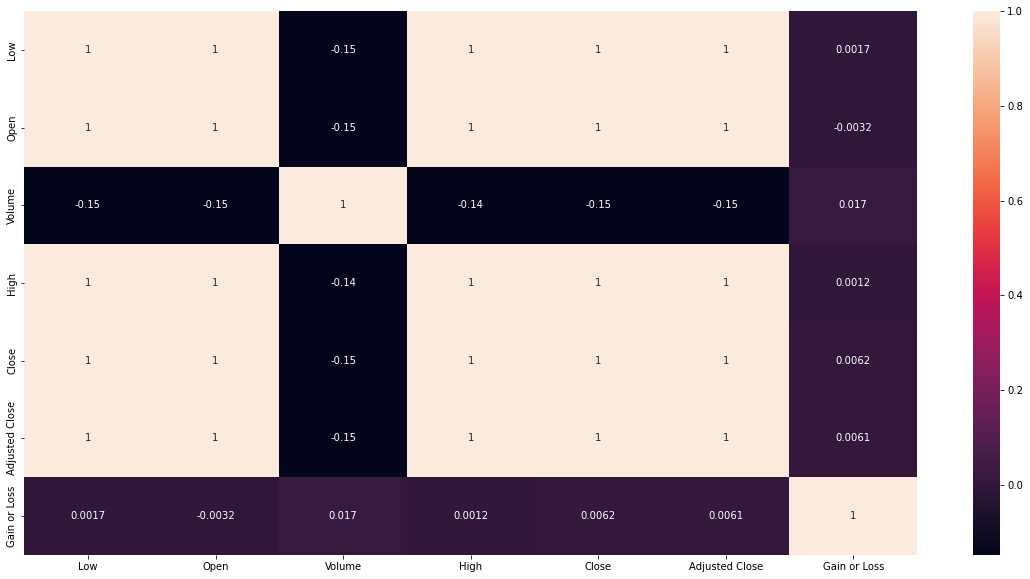

In [32]:
# Now let us visualize our matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [110]:
# Looking for correlations from our corr_matrix
corr_matrix["Close"].sort_values(ascending=False)

Close             1.000000
Adjusted Close    0.999997
Low               0.999780
High              0.999756
Open              0.999488
Gain or Loss      0.006179
Volume           -0.145668
Name: Close, dtype: float64

array([[<AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='Volume', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Adjusted Close', ylabel='Low'>],
       [<AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Adjusted Close', ylabel='Open'>],
       [<AxesSubplot:xlabel='Low', ylabel='Volume'>,
        <AxesSubplot:xlabel='Open', ylabel='Volume'>,
        <AxesSubplot:xlabel='Volume', ylabel='Volume'>,
        <AxesSubplot:xlabel='High', ylabel='Volume'>,
        <AxesSubplot:xlabel='Close', ylabel='Volume'>,
        <AxesSubplot:xlabel='Adjusted Close', ylabel='Volume'>],
       [<AxesSubplo

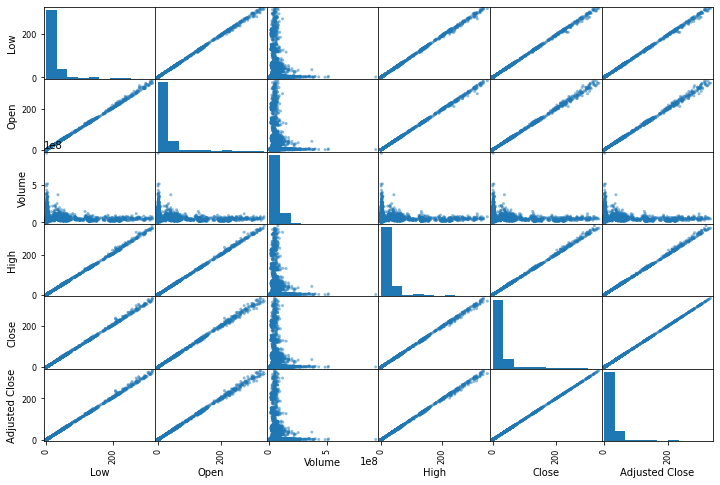

In [87]:
attributes = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
scatter_matrix(time_ticker_df[attributes], figsize=(12, 8))

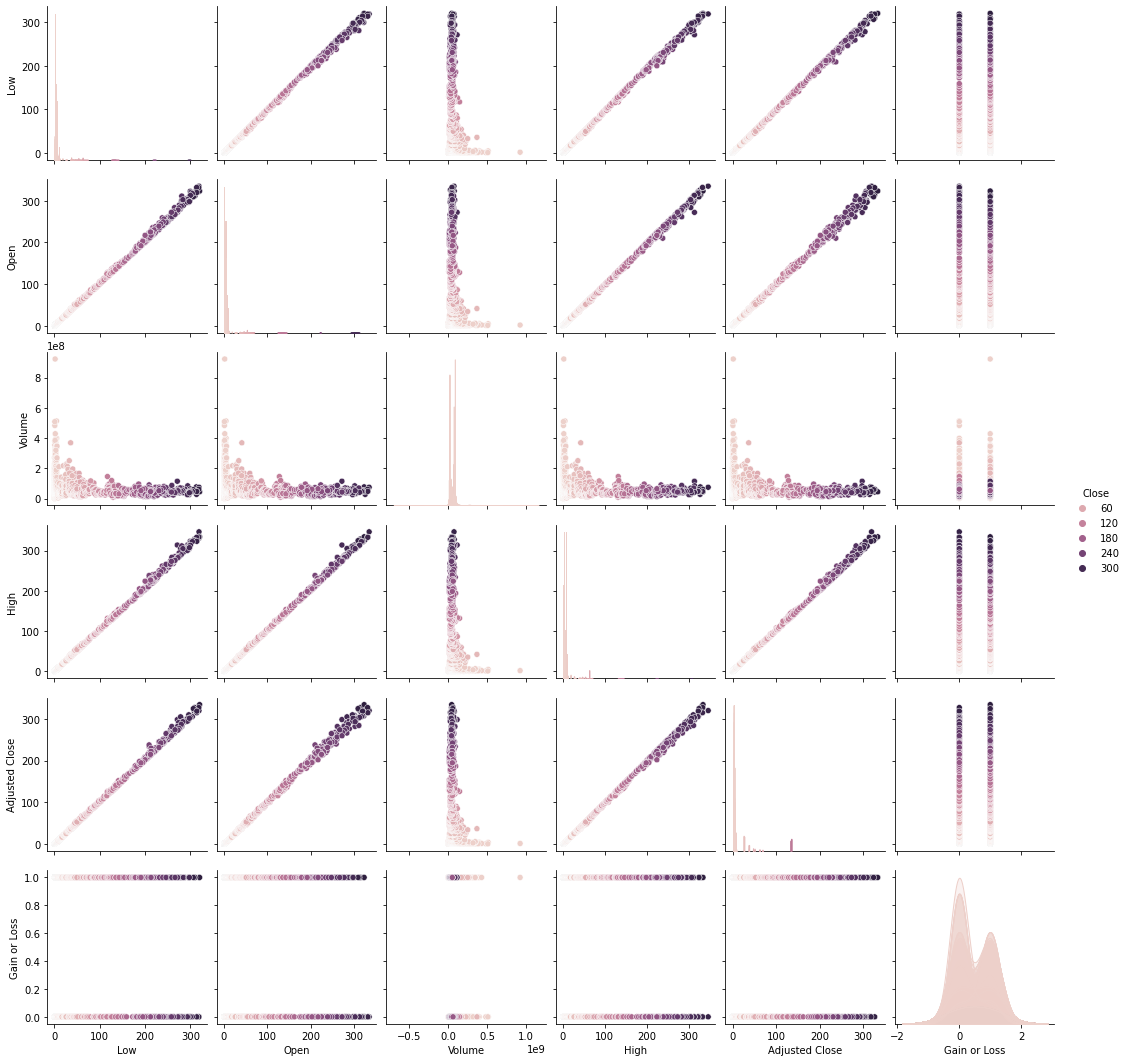

In [34]:
# We then visualize this further by making a pairplot
sns.pairplot(time_ticker_df, hue='Close')
plt.show()

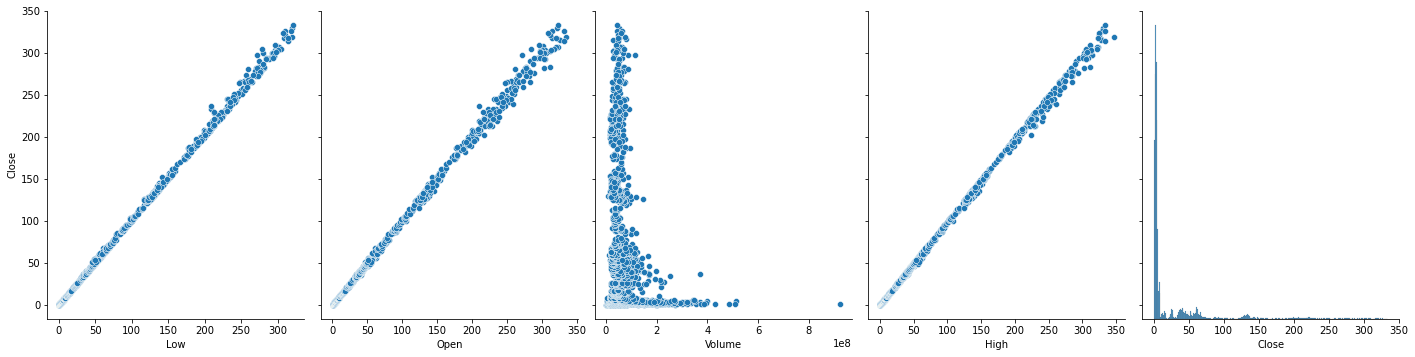

In [35]:
# ticker_df : 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'

# Visualizing all the features by using scatterplots
sns.pairplot(time_ticker_df, x_vars=['Low', 'Open', 'Volume', 'High', 'Close'], y_vars='Close', height=5, aspect=0.8)

array([[<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adjusted Close'}>],
       [<AxesSubplot:title={'center':'Gain or Loss'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

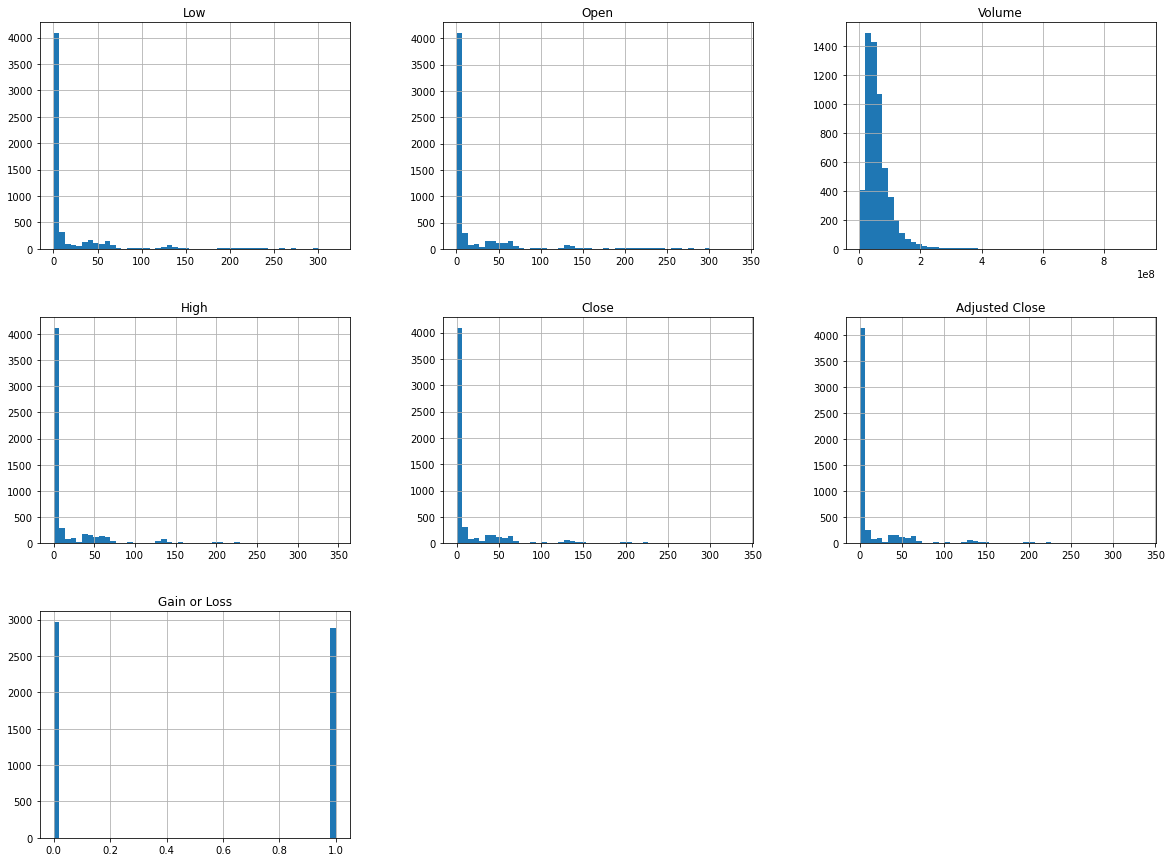

In [78]:
time_ticker_df.hist(bins=50, figsize=(20, 15))

<AxesSubplot:xlabel='Gain or Loss', ylabel='Volume'>

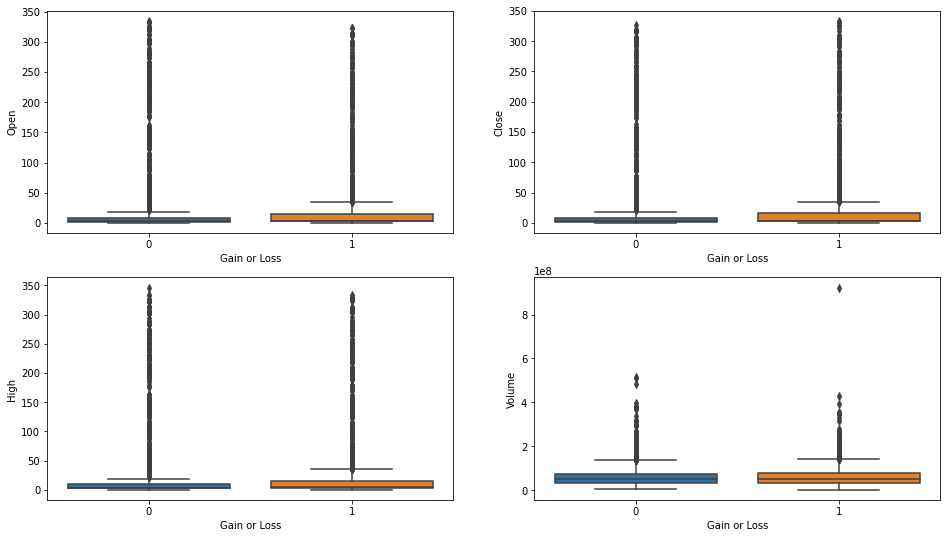

In [120]:
fig, axes = plt.subplots(2,2, figsize=(16,9))

sns.boxplot(x='Gain or Loss', y='Open', data=time_ticker_df, orient='v', ax=axes[0,0])
sns.boxplot(x='Gain or Loss', y='Close', data=time_ticker_df, orient='v', ax=axes[0,1])
sns.boxplot(x='Gain or Loss', y='High', data=time_ticker_df, orient='v', ax=axes[1,0])
sns.boxplot(x='Gain or Loss', y='Volume', data=time_ticker_df, orient='v', ax=axes[1,1])

<AxesSubplot:xlabel='Volume', ylabel='Close'>

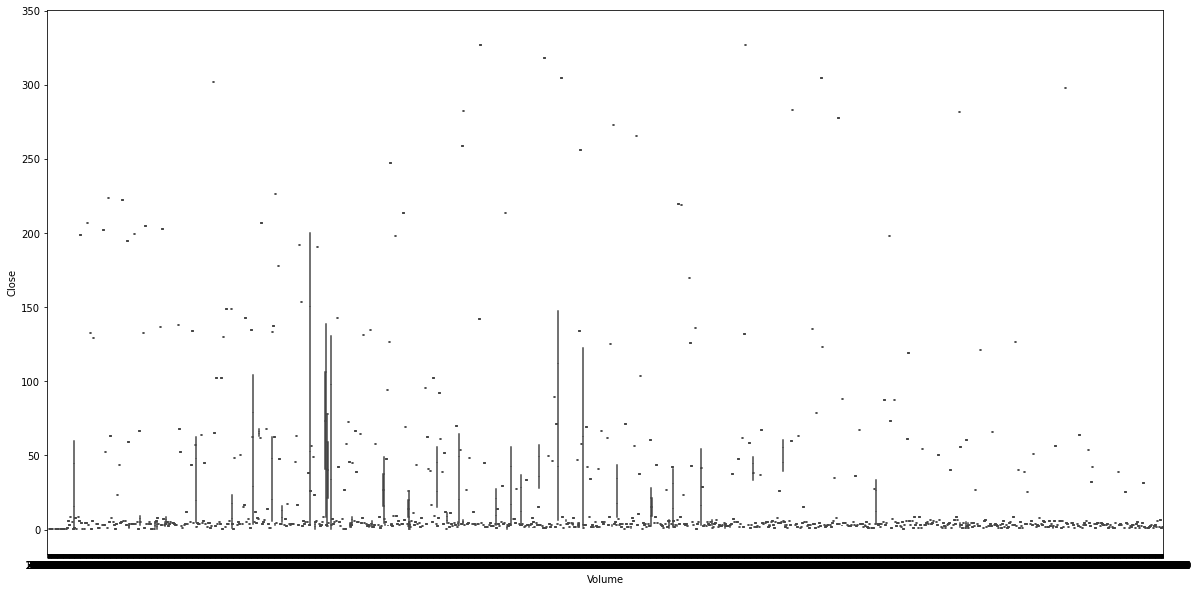

In [36]:
# By looking at the plots we can see that Low, Open and high seem to have a linear correlation with the closing price.
# Let us search for outliers and see how the data is distributed
sns.boxplot(x="Volume", y="Close", data=time_ticker_df)

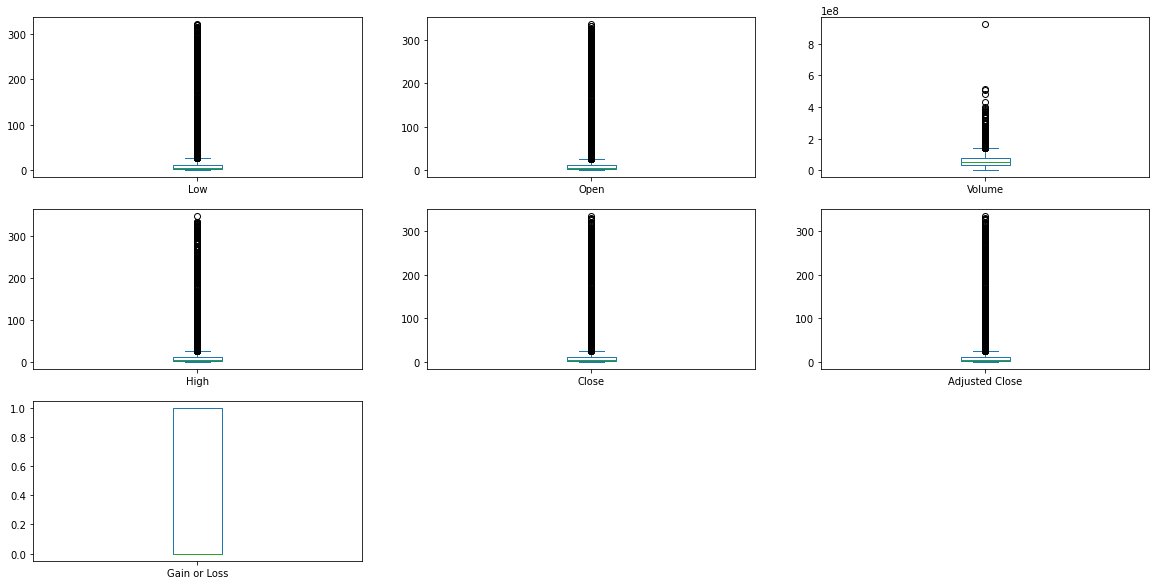

In [80]:
# Draw box-whisker plots
time_ticker_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

array([[<AxesSubplot:xlabel='Volume', ylabel='Volume'>,
        <AxesSubplot:xlabel='Close', ylabel='Volume'>],
       [<AxesSubplot:xlabel='Volume', ylabel='Close'>,
        <AxesSubplot:xlabel='Close', ylabel='Close'>]], dtype=object)

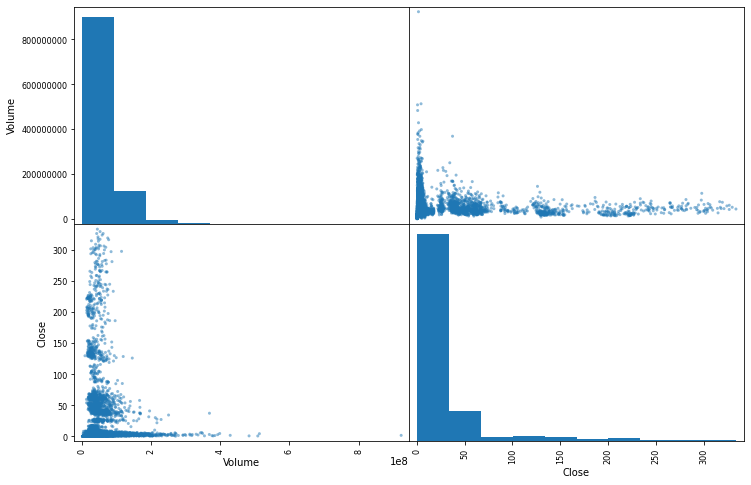

In [88]:
# We are trying to analyze whether news has an effect on price and volume.
# Therefor our focus will be on exploring those features further

attributes = ['Volume', 'Close']
scatter_matrix(time_ticker_df[attributes], figsize=(12, 8))

<AxesSubplot:ylabel='Volume'>

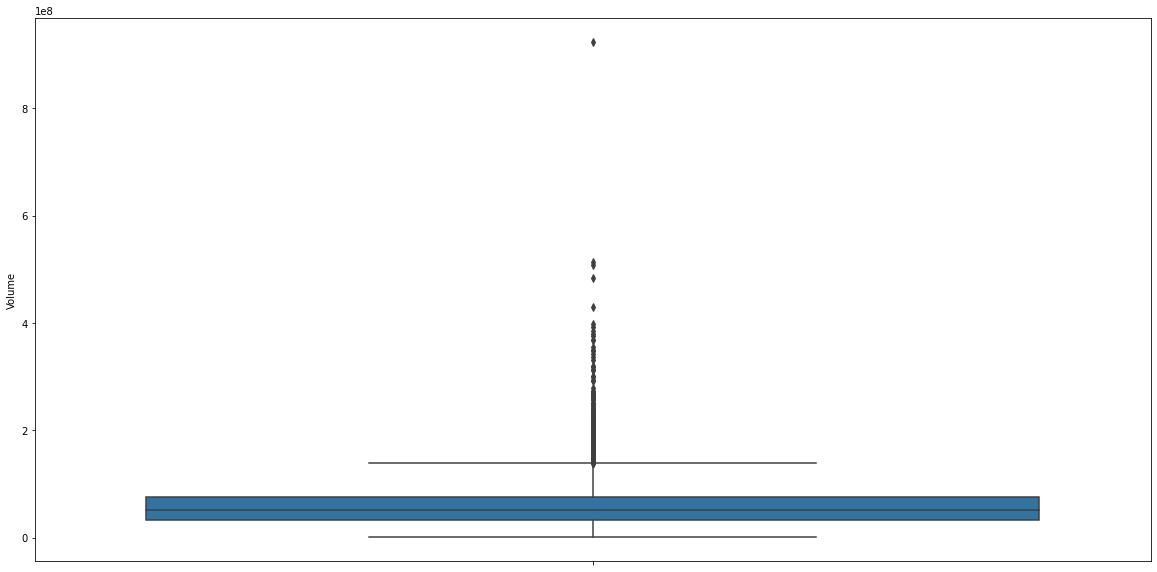

In [89]:
sns.boxplot(y=time_ticker_df["Volume"])

<AxesSubplot:xlabel='Volume', ylabel='Count'>

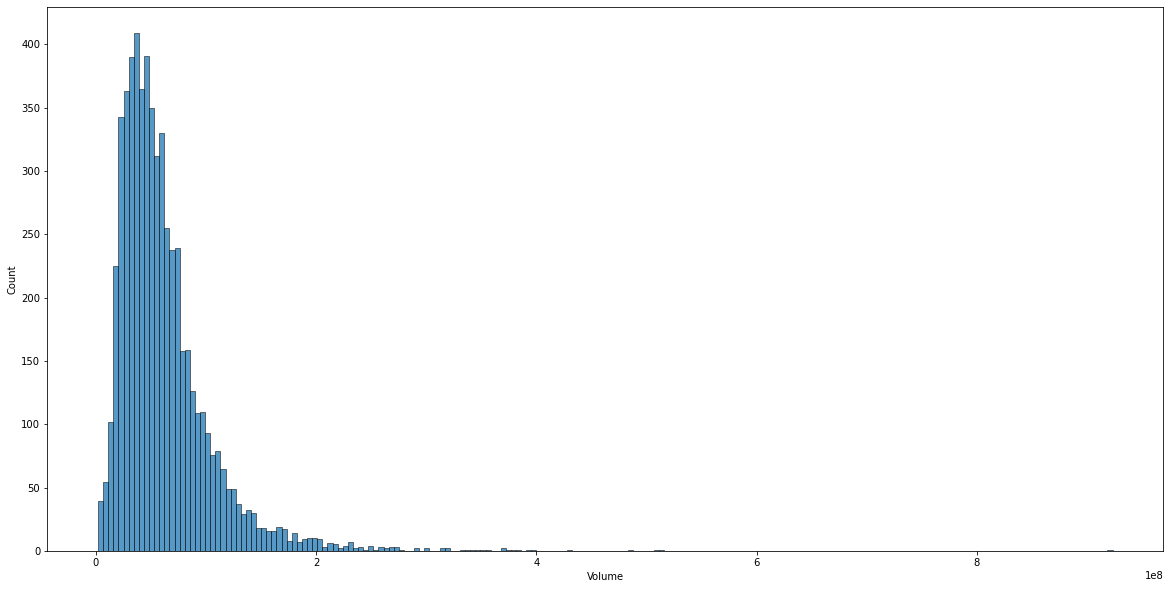

In [47]:
sns.histplot(time_ticker_df['Volume'],  label='Volume')  
#sns.distplot(ticker_df['Volume'],  label='Volume', norm_hist=True)  

<AxesSubplot:ylabel='Close'>

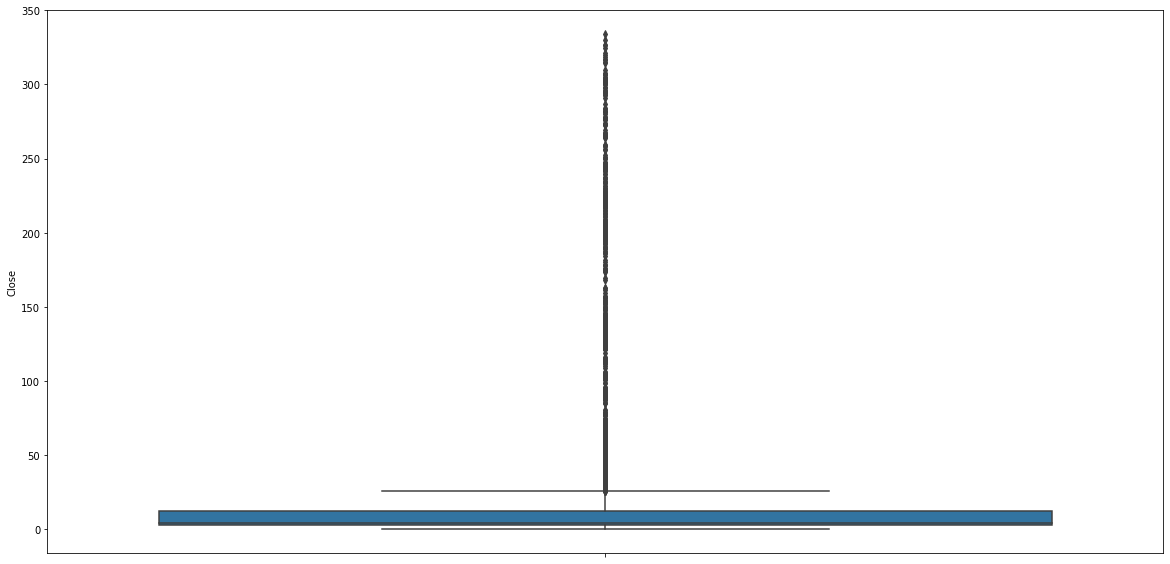

In [50]:
sns.boxplot(y=time_ticker_df["Close"])

<AxesSubplot:xlabel='Close', ylabel='Count'>

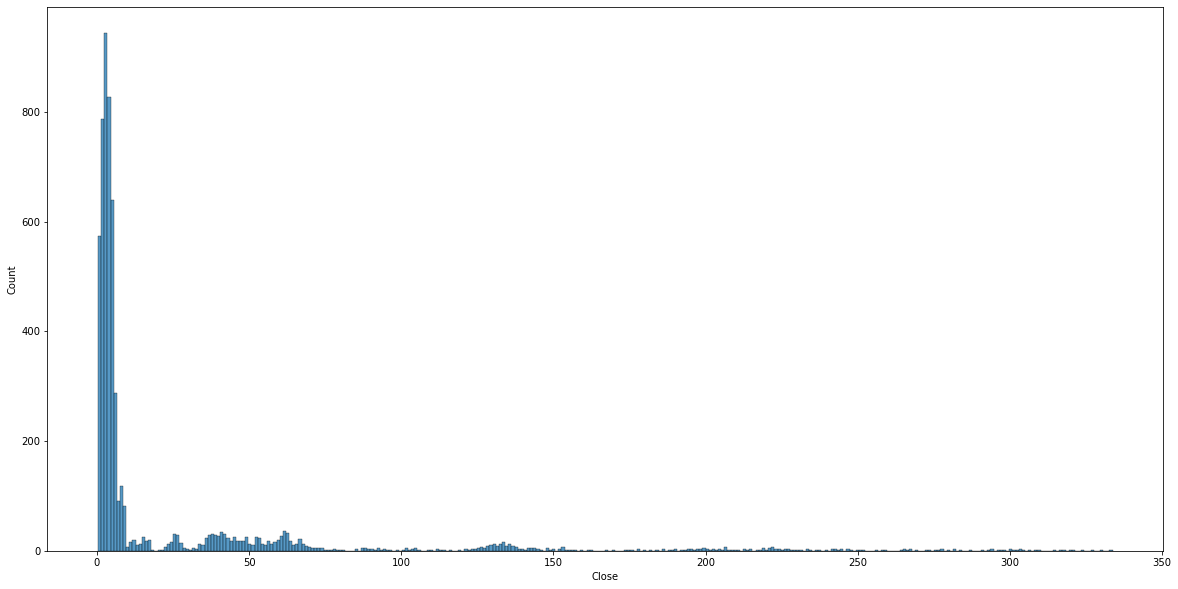

In [54]:
sns.histplot(time_ticker_df['Close'],  label='Close')  
#sns.distplot(ticker_df['Close'],  label='Close', norm_hist=True)  

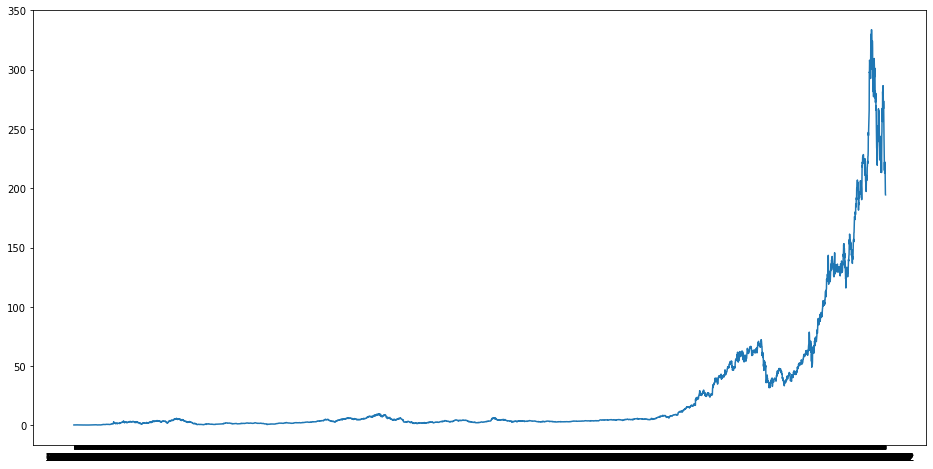

In [56]:
# Let us get a full picture of all the moves the stock has done over time by looking at the closing price

#df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
time_ticker_df.index=time_ticker_df['Day-Month-Year']

plt.figure(figsize=(16, 8))
plt.plot(time_ticker_df["Close"], label='Close Price history')

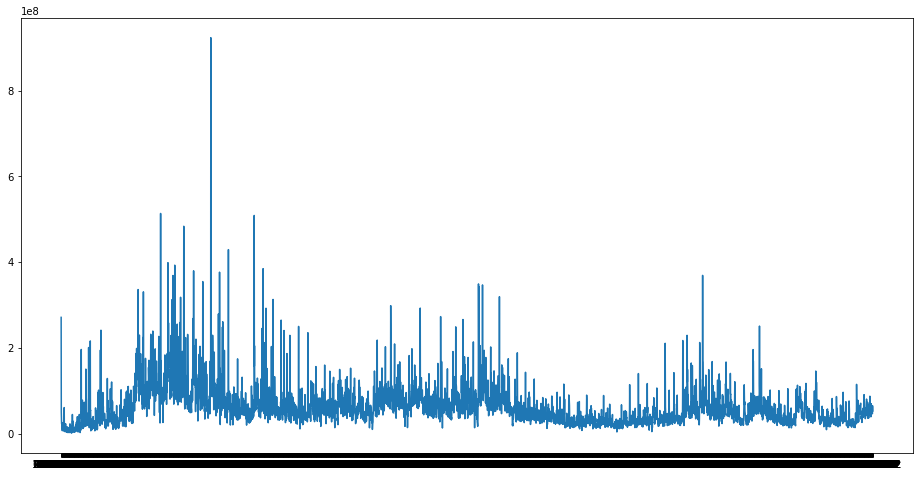

In [82]:
plt.figure(figsize=(16, 8))
plt.plot(time_ticker_df["Volume"], label='Volume history')

<AxesSubplot:xlabel='Day-Month-Year'>

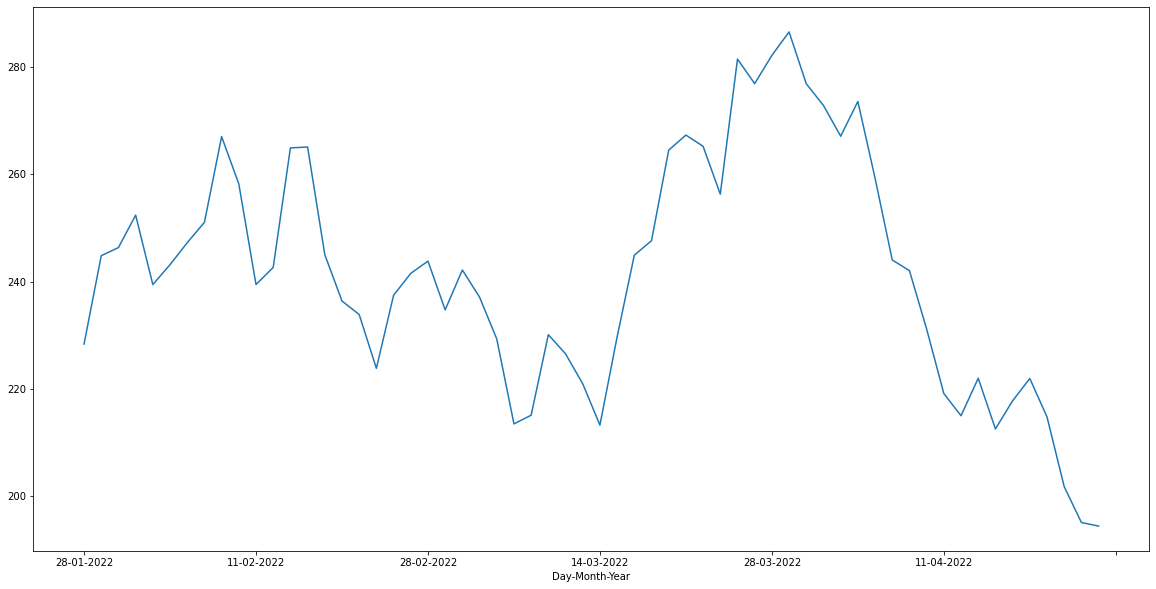

In [57]:
# We are then zooming in to look at the last three months to potentially find the current trend
three_months_open = time_ticker_df.iloc[-60:]
three_months_open['Close'].plot()

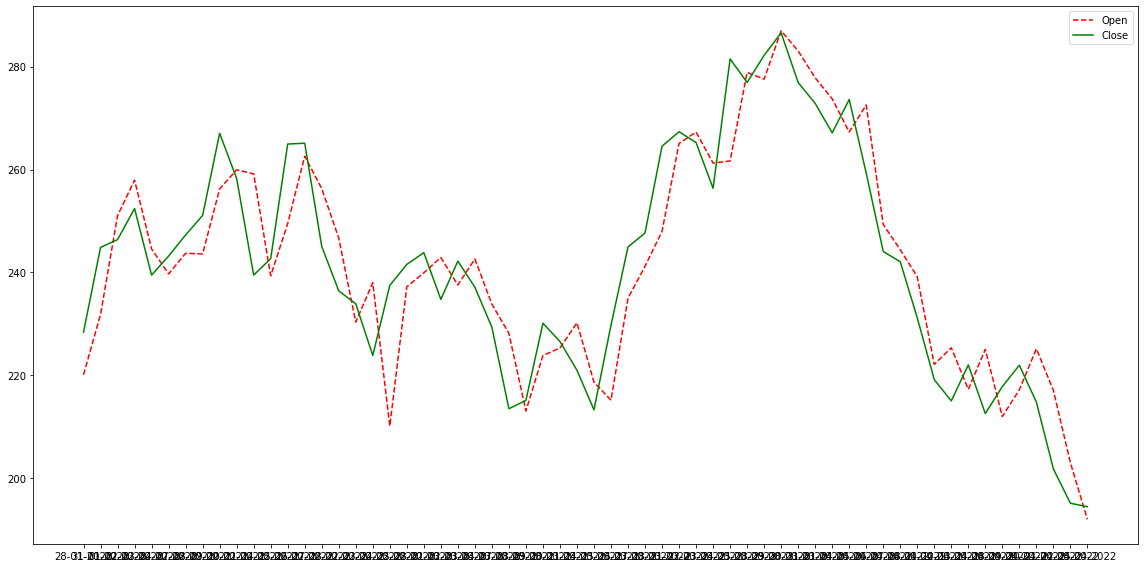

In [90]:
# Viewing open vs close
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(three_months_open.index, three_months_open['Open'], '--', color='r', label='Open')
ax.plot(three_months_open.index, three_months_open['Close'], '-', color='g', label='Close')
ax.legend()
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='Day-Month-Year'>

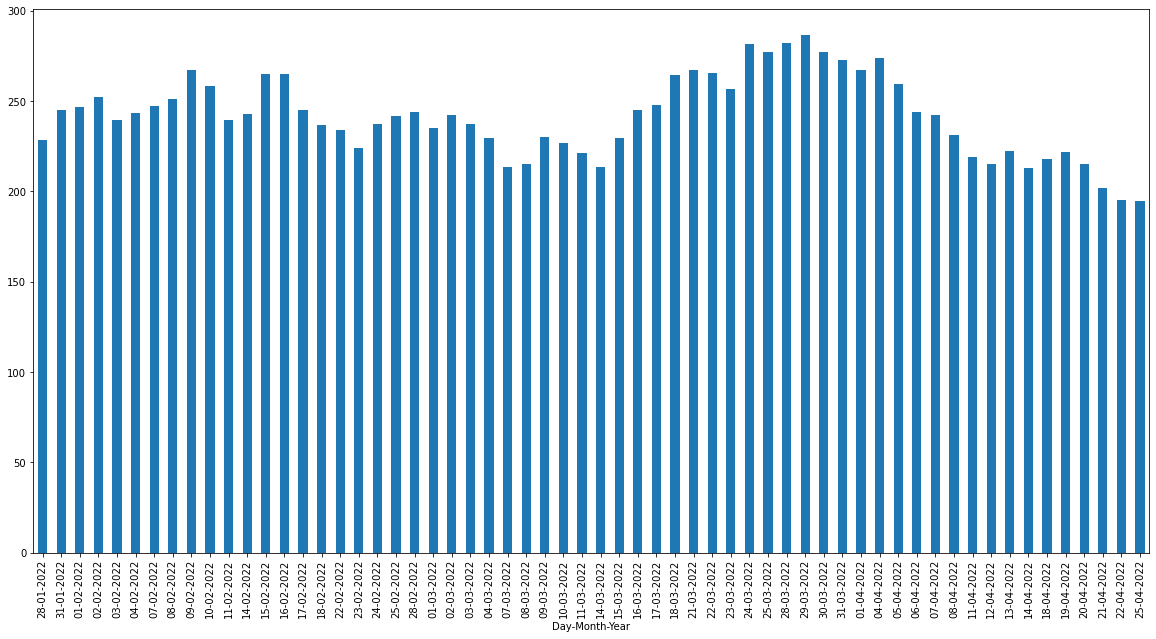

In [94]:
# Looking at the closing price over the past three months
three_months_open['Close'].plot(kind='bar')

<AxesSubplot:>

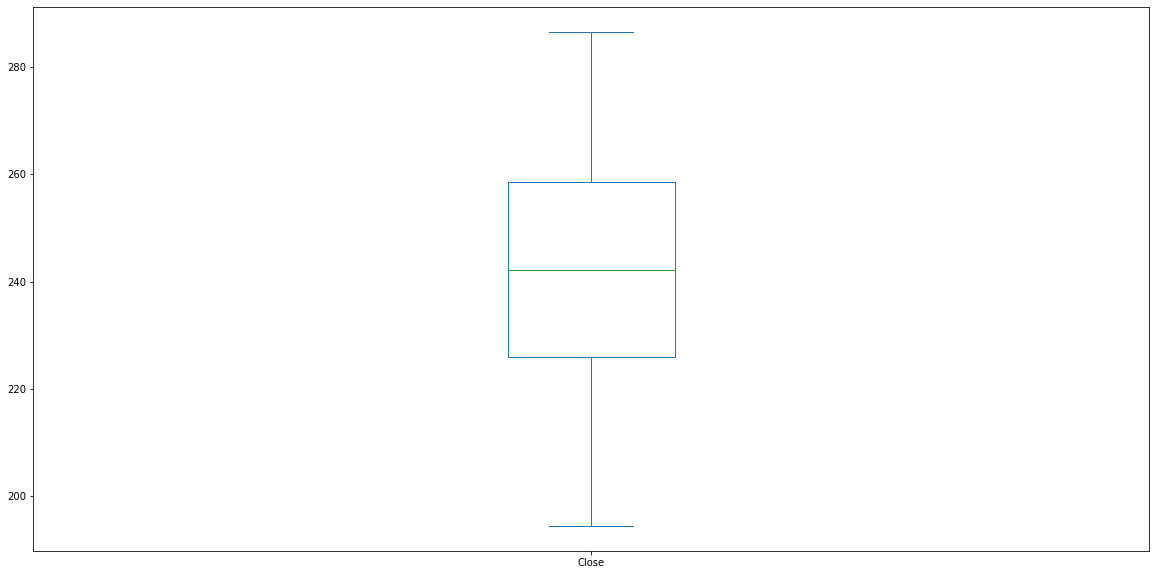

In [70]:
# Looking for outliers in the closing price the past three months
three_months_open['Close'].plot(kind='box')

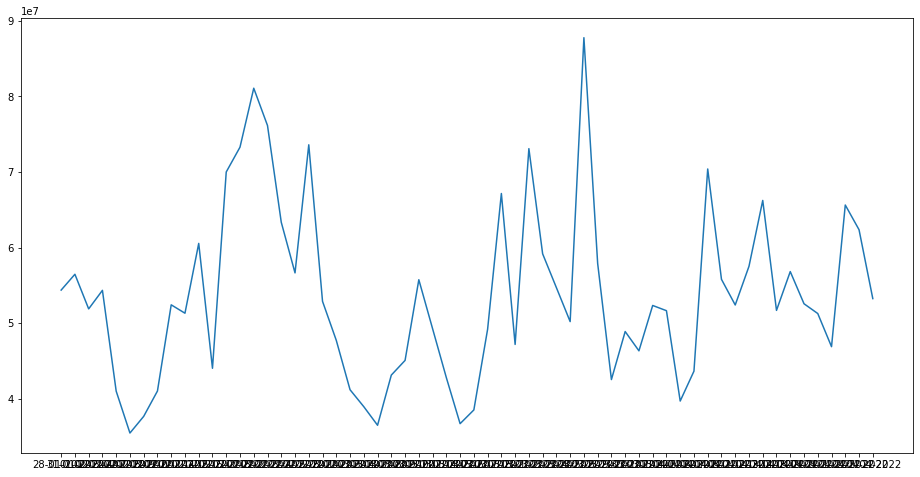

In [95]:
# Looking at the volume the past three months
plt.figure(figsize=(16, 8))
plt.plot(three_months_open["Volume"], label='Volume history')

<AxesSubplot:xlabel='Day-Month-Year'>

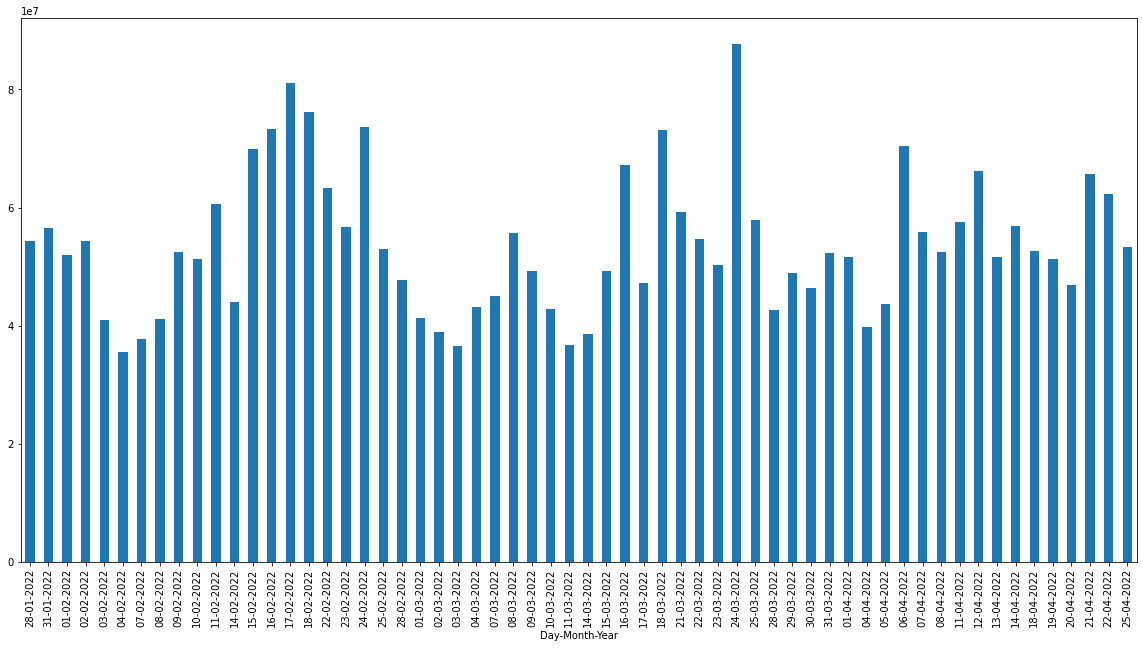

In [69]:
# Looking at the volume the past three months
three_months_open['Volume'].plot(kind='bar')

<AxesSubplot:>

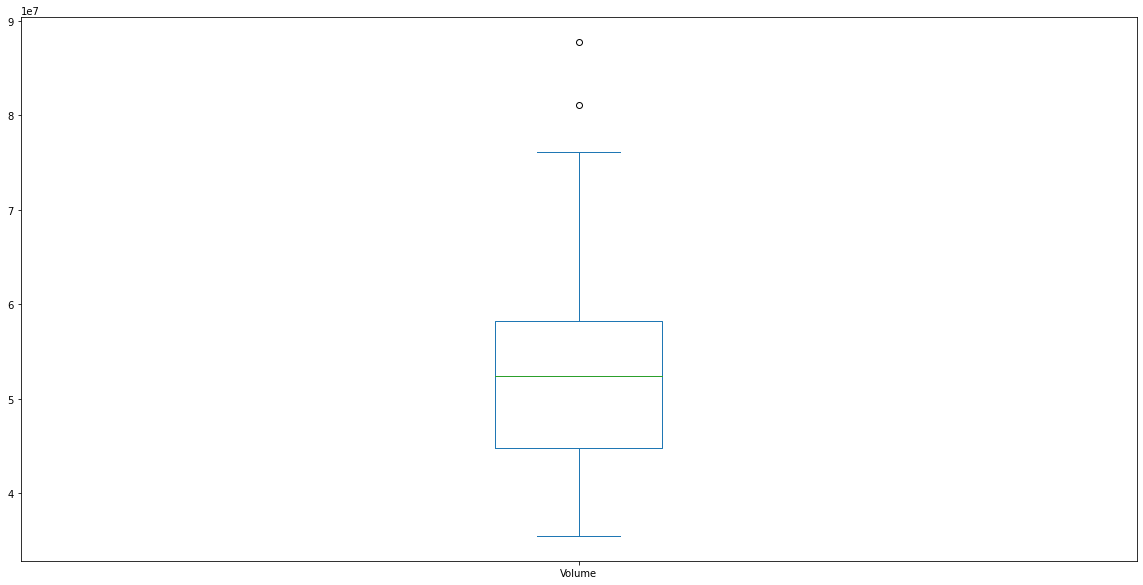

In [68]:
three_months_open['Volume'].plot(kind='box')

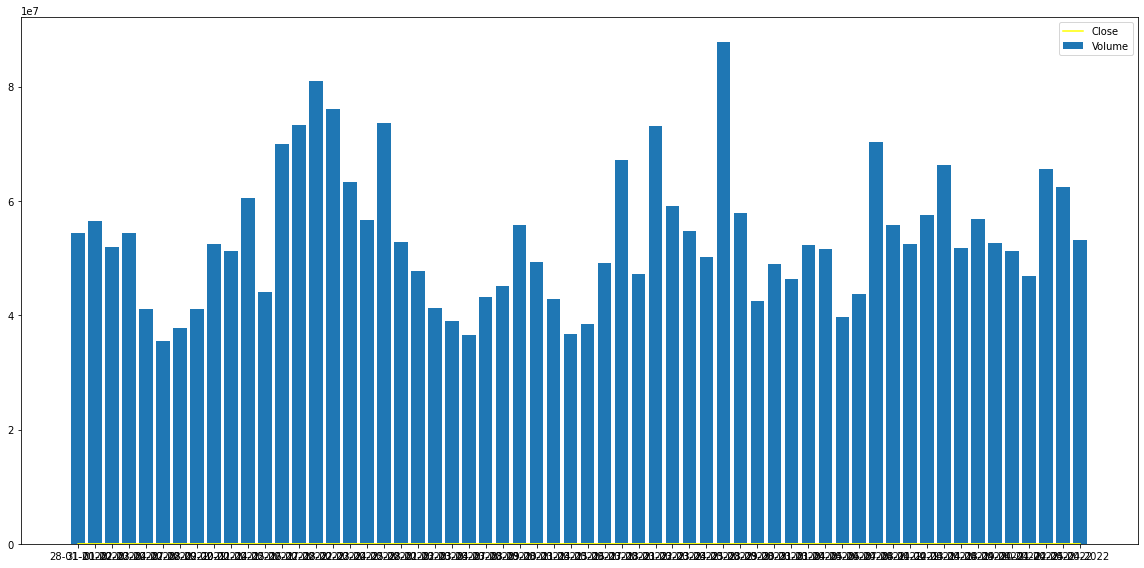

In [72]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(three_months_open.index, three_months_open['Volume'], label='Volume')
ax.plot(three_months_open.index, three_months_open['Close'], '-', color='yellow', label='Close')
ax.legend()
fig.tight_layout()
plt.show()

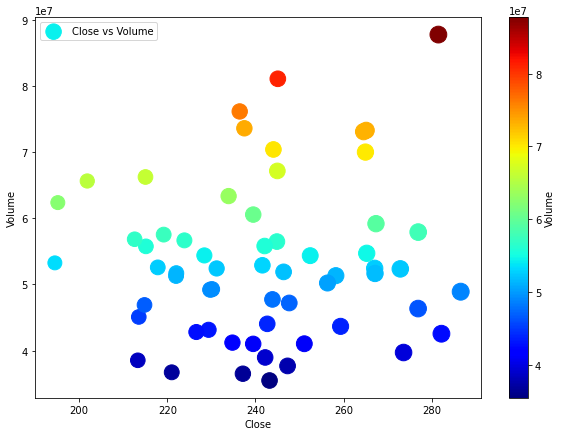

In [96]:
# Looking for a relationship between closing price and volume over the past three months
three_months_open.plot(kind="scatter", x="Close", y="Volume", alpha=1,
    s=three_months_open["Close"], label="Close vs Volume", figsize=(10,7),
    c="Volume", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

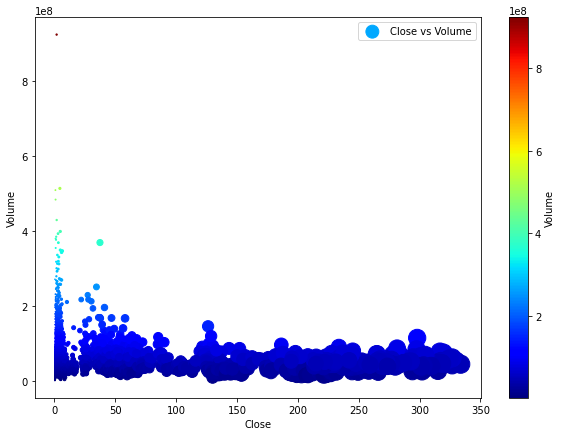

In [97]:
# Looking for a relationship between closing price and volume over the whole periode
time_ticker_df.plot(kind="scatter", x="Close", y="Volume", alpha=1,
    s=time_ticker_df["Close"], label="Close vs Volume", figsize=(10,7),
    c="Volume", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [98]:
time_ticker_df.head()

,Day-Month-Year,Date,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
Day-Month-Year,,,,,,,,,
22-01-1999,22-01-1999,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886,0
25-01-1999,25-01-1999,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370,1
26-01-1999,26-01-1999,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065,0
27-01-1999,27-01-1999,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869,0
28-01-1999,28-01-1999,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673,0


#### 2.1.4 Preperation for machine learning

In [106]:
# Converting the dataset into two arrays
array = time_ticker_df.values
# Create two (sub) arrays from it
X = array[:,2:8] # data without class
y = array[:,8]   # just class
# Before we can use our data for machine learning we have to split the data into train and test sets
print("X from array:", len(X))
print("y from array:", len(y))

X from array: 5853
y from array: 5853


In [121]:
# Our test size will be 20% of the dataset.
test_set_size = 0.2
# Random_state=3 has been added as a tool to always be able to reproduce the same split 
random_set_state = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=random_set_state)

In [122]:
# To verify that the data has been split correctly.
print("Training dataset (80%):", len(X_train))
print("Test dataset (20%):", len(X_test))

Training dataset (80%): 4682
Test dataset (20%): 1171


### 2.2 News dataset

In [110]:
news_df = pd.read_csv('../data/news/analyst_ratings_processed.csv', delimiter=",")

In [111]:
news_df.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [112]:
news_df.tail()

,Unnamed: 0,title,date,stock
1400464,1413844.0,Top Narrow Based Indexes For August 29,2011-08-29 10:41:00-04:00,ZX
1400465,1413845.0,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 16:44:00-04:00,ZX
1400466,1413846.0,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 08:26:00-04:00,ZX
1400467,1413847.0,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 05:59:00-04:00,ZX
1400468,1413848.0,China Zenix Auto International Opens For Tradi...,2011-05-12 09:36:00-04:00,ZX


#### 2.2.1 describing dataset

In [113]:
news_df.shape

(1400469, 4)

In [114]:
news_df.columns

Index(['Unnamed: 0', 'title', 'date', 'stock'], dtype='object')

In [115]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400469 entries, 0 to 1400468
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1399180 non-null  float64
 1   title       1400469 non-null  object 
 2   date        1399180 non-null  object 
 3   stock       1397891 non-null  object 
dtypes: float64(1), object(3)
memory usage: 42.7+ MB


In [116]:
news_df.isnull().sum()

Unnamed: 0    1289
title            0
date          1289
stock         2578
dtype: int64

#### 2.2.2 Initial Cleaning of dataset
Our todo list for cleaning is as following:
1. Remove the unnamed column, as this column represent some kind of index, however since there are null values, its pretty useless
2. Remove rows that contain any kind of null value. Since we have 1m+ data rows we wont worry about a few thousands being dropped. since there is no value in using any average tool or other techniques to fill out these rows.
3. Converting dates into pandas datatime objects in a new column called date_time

In [49]:
# Removing Unnamed column (index)
news_df = news_df.iloc[:,1:]
news_df.head()

,title,date,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [75]:
#Removing rows that contain null values
news_df.dropna(inplace=True)
news_df.isnull().sum()

title        0
date         0
stock        0
date_time    0
dtype: int64

In [51]:
#Converting date into pandas datetime and putting into date_time column
news_df['date_time'] = pd.to_datetime(news_df['date'].str[:19], format="%Y-%m-%d %H:%M:%S", errors='coerce')

In [52]:
news_df['date_time']

0         2020-06-05 10:30:00
1         2020-06-03 10:45:00
2         2020-05-26 04:30:00
3         2020-05-22 12:45:00
4         2020-05-22 11:38:00
                  ...        
1400464   2011-08-29 10:41:00
1400465   2011-06-22 16:44:00
1400466   2011-06-21 08:26:00
1400467   2011-06-21 05:59:00
1400468   2011-05-12 09:36:00
Name: date_time, Length: 1397891, dtype: datetime64[ns]

#### 2.2.3 Exploring and visualizing the data

##### 2.2.3.1 Date Column
We want to investigate the date column to see when our news data exist

In [64]:
sorted_news_df = news_df.sort_values(by = 'date_time')
sorted_news_df['combined'] = sorted_news_df['date_time'].dt.month.astype(str).str.zfill(2) + '-' +  sorted_news_df['date_time'].dt.year.astype(str).str[:4]
sorted_news_df['combined'].unique()

array(['02-2009', '04-2009', '05-2009', '06-2009', '07-2009', '08-2009',
       '09-2009', '10-2009', '11-2009', '12-2009', '01-2010', '02-2010',
       '03-2010', '04-2010', '05-2010', '06-2010', '07-2010', '08-2010',
       '09-2010', '10-2010', '11-2010', '12-2010', '01-2011', '02-2011',
       '03-2011', '04-2011', '05-2011', '06-2011', '07-2011', '08-2011',
       '09-2011', '10-2011', '11-2011', '12-2011', '01-2012', '02-2012',
       '03-2012', '04-2012', '05-2012', '06-2012', '07-2012', '08-2012',
       '09-2012', '10-2012', '11-2012', '12-2012', '01-2013', '02-2013',
       '03-2013', '04-2013', '05-2013', '06-2013', '07-2013', '08-2013',
       '09-2013', '10-2013', '11-2013', '12-2013', '01-2014', '02-2014',
       '03-2014', '04-2014', '05-2014', '06-2014', '07-2014', '08-2014',
       '09-2014', '10-2014', '11-2014', '12-2014', '01-2015', '02-2015',
       '03-2015', '04-2015', '05-2015', '06-2015', '07-2015', '08-2015',
       '09-2015', '10-2015', '11-2015', '12-2015', 

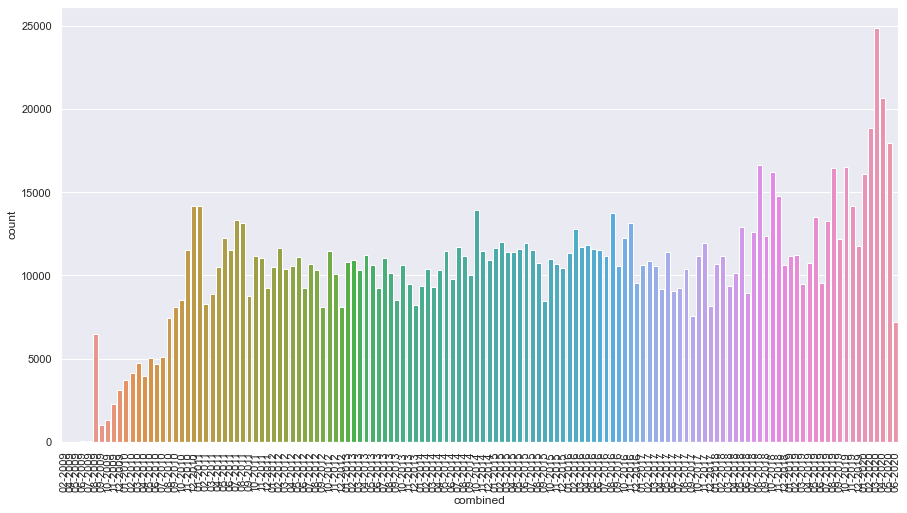

In [65]:
sns.set(rc = {'figure.figsize':(15,8)})
chart = sns.countplot(x='combined', data=sorted_news_df)
chart.tick_params(axis = 'x', rotation = 90)

we can see that there are very few news stories from before 08-2020. therefore we will remove this data, this account for around 45k rows.

In [72]:
news_df = news_df[~(news_df['date_time'] < '2010-08-01')]

In [73]:
sorted_news_df = news_df.sort_values(by = 'date_time')
sorted_news_df['combined'] = sorted_news_df['date_time'].dt.month.astype(str).str.zfill(2) + '-' +  sorted_news_df['date_time'].dt.year.astype(str).str[:4]
sorted_news_df['combined'].unique()

array(['08-2010', '09-2010', '10-2010', '11-2010', '12-2010', '01-2011',
       '02-2011', '03-2011', '04-2011', '05-2011', '06-2011', '07-2011',
       '08-2011', '09-2011', '10-2011', '11-2011', '12-2011', '01-2012',
       '02-2012', '03-2012', '04-2012', '05-2012', '06-2012', '07-2012',
       '08-2012', '09-2012', '10-2012', '11-2012', '12-2012', '01-2013',
       '02-2013', '03-2013', '04-2013', '05-2013', '06-2013', '07-2013',
       '08-2013', '09-2013', '10-2013', '11-2013', '12-2013', '01-2014',
       '02-2014', '03-2014', '04-2014', '05-2014', '06-2014', '07-2014',
       '08-2014', '09-2014', '10-2014', '11-2014', '12-2014', '01-2015',
       '02-2015', '03-2015', '04-2015', '05-2015', '06-2015', '07-2015',
       '08-2015', '09-2015', '10-2015', '11-2015', '12-2015', '01-2016',
       '02-2016', '03-2016', '04-2016', '05-2016', '06-2016', '07-2016',
       '08-2016', '09-2016', '10-2016', '11-2016', '12-2016', '01-2017',
       '02-2017', '03-2017', '04-2017', '05-2017', 

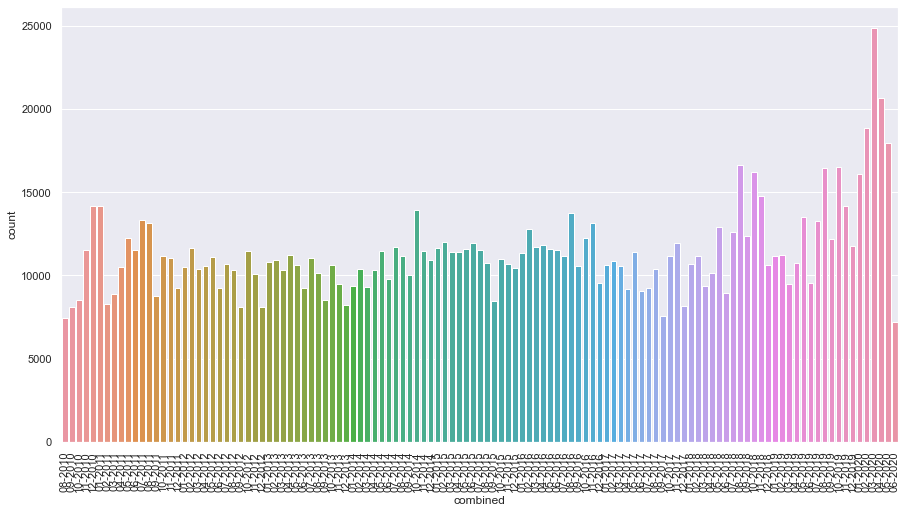

In [74]:
sns.set(rc = {'figure.figsize':(15,8)})
chart = sns.countplot(x='combined', data=sorted_news_df)
chart.tick_params(axis = 'x', rotation = 90)

#### 2.2.3.2 Stock Column

we want to investigate how many news stories that are related to each stock

In [79]:
df = news_df["stock"].value_counts()
df.head()

MRK     3179
MU      3144
NVDA    3133
QQQ     3100
EBAY    3021
Name: stock, dtype: int64

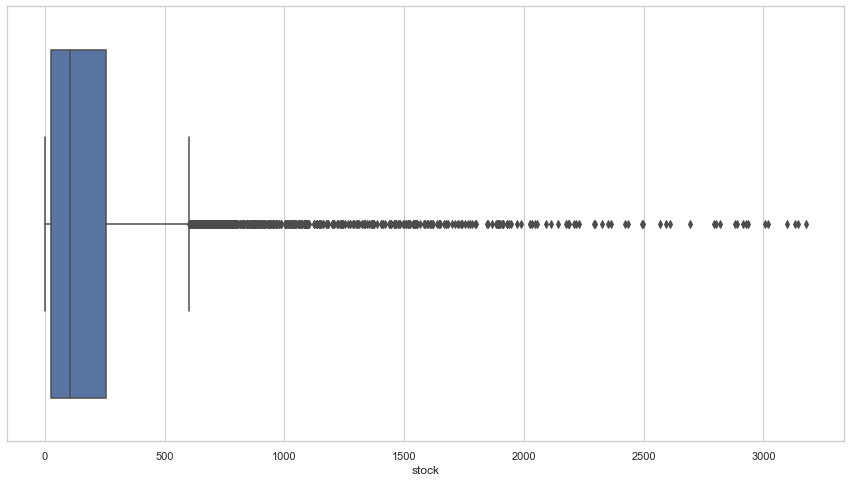

In [81]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df)

In [104]:
most_interesting_stocks = df[~(df.iloc[:] <= 2000)]  

In [106]:
most_interesting_stocks.shape

(41,)

In [108]:
most_interesting_stocks.head(41)

MRK     3179
MU      3144
NVDA    3133
QQQ     3100
EBAY    3021
NFLX    3009
VZ      2937
JNJ     2927
QCOM    2915
MS      2892
GILD    2882
BABA    2820
M       2801
DAL     2794
ORCL    2695
WFC     2612
KO      2595
BBRY    2570
JCP     2498
FDX     2495
BMY     2437
HD      2424
CMG     2365
AGN     2353
LLY     2328
CAT     2299
GPRO    2292
FSLR    2232
P       2216
MCD     2208
LMT     2189
CHK     2184
TWX     2175
EWU     2141
XLF     2113
GRPN    2093
EA      2053
NOK     2046
GLD     2034
EWP     2027
GPS     2024
Name: stock, dtype: int64

#### 2.2.4 Preperation for machine learning

In [68]:
#vectorization of headlines
#https://spacy.io/

### 2.3 Combining dataset

In [19]:
#Is this necessary?

#Date - # news features - y værdie er ticker up or down

## 3. Machine Learning

## 4. Visualiaztion

## 5. Project solution